In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [146]:
data = pd.read_csv("../test.dat");

,total_moves_accepted,objective,volume_penalty,global_curvature_penalty,local_curvature_variance_penalty,local_solid_angle_curvature_variance_penalty,total_moves_tried,num_1_4_bistellar_accepted,num_1_4_bistellar_tried,num_2_3_bistellar_accepted,...,codim3_simps_of_deg_38,codim3_simps_of_deg_40,codim3_simps_of_deg_42,codim3_simps_of_deg_44,codim3_simps_of_deg_46,codim3_simps_of_deg_48,codim3_simps_of_deg_50,codim3_simps_of_deg_52,codim3_simps_of_deg_54,codim3_deg_tail
0,10000,2.5,25,8539.93,87476,4483260.0,18879,2081,5628,4570,...,8,7,5,4,5,5,3,2,0,82
1,20000,2.5,25,18930.50,73030,3954590.0,47959,2297,13898,8285,...,12,8,10,1,5,4,5,3,2,88


In [142]:
properties_to_check = [
    "objective",
    "num_3_simplices",
    "deg_var_0_simplices",
    "deg_mean_1_simplices",
    "deg_var_1_simplices"
]

results = pd.DataFrame(columns=["property", "slope", "p-value"])
for property in properties_to_check:
    normalized_data = data[property] / max(data[property])
    regress = linregress(data["total_moves_accepted"], normalized_data)
    results.loc[len(results)] = [property, regress.slope, regress.pvalue]

results

,property,slope,p-value
0,objective,0.000000e+00,1.0
1,num_3_simplices,0.000000e+00,1.0
2,deg_var_0_simplices,6.647869e-07,0.0
3,deg_mean_1_simplices,1.938833e-06,0.0
4,deg_var_1_simplices,-1.370085e-05,0.0


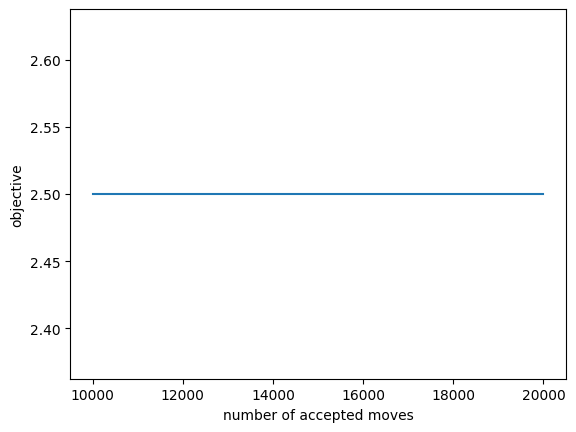

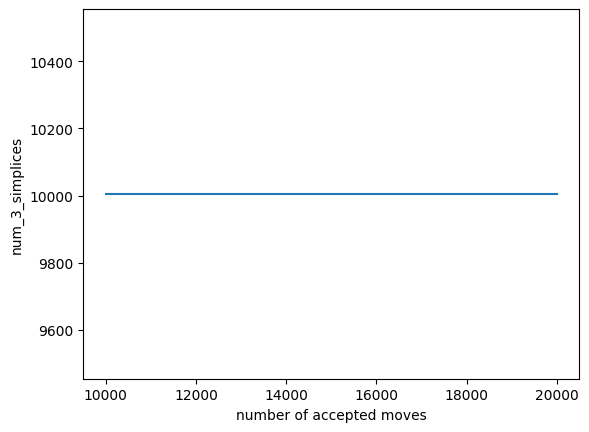

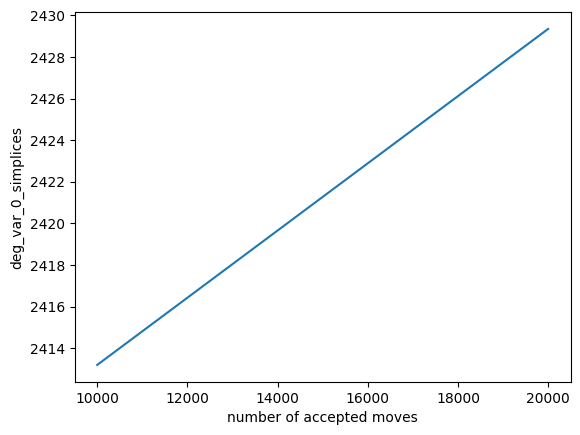

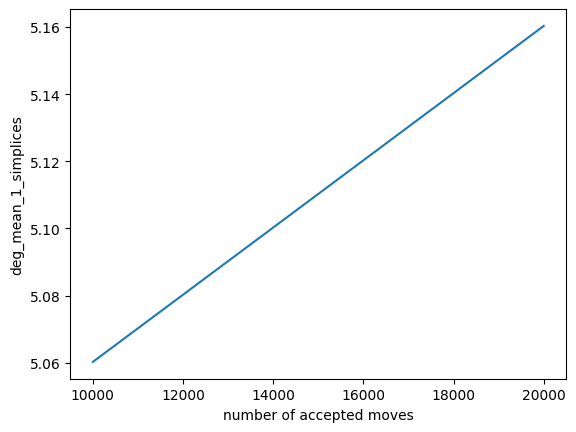

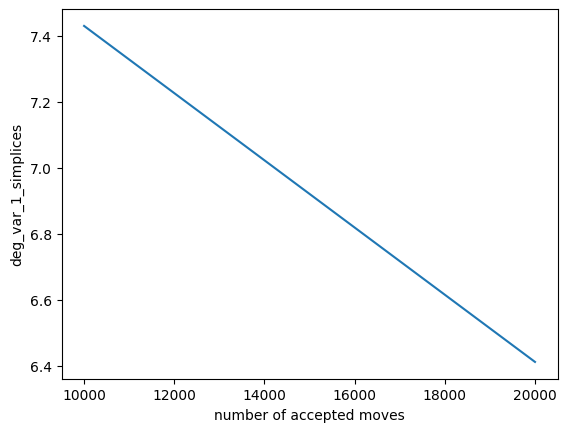

In [143]:
for property in properties_to_check:
    plt.plot(data["total_moves_accepted"], data[property]);
    plt.xlabel("number of accepted moves")
    plt.ylabel(property)
    plt.show()

In [144]:
np.mean(data["deg_mean_0_simplices"])

23.0608